## Imports

In [1]:
import mdtraj as md
import pandas as pd
import numpy as np
import subprocess
import matplotlib.pyplot as plt
%matplotlib inline

## Data In

In [2]:
# Load the protein only trajectory
traj = md.load_dcd("ion_joined_output_corrected_-1.dcd", top='Start_Ion.pdb')

### Protein Selection

In [3]:
# selecting protein as index
protein_selection = traj.topology.select('protein')

# Applying index selection to trajectory
traj_protein_selection = traj.atom_slice(protein_selection)

## Analysis

#### set x-axis

In [4]:
timens = np.arange(0, 25, 0.2)

### RMSD

In [5]:
# Compute RMSD of protein
rmsd_protein = md.rmsd(traj_protein_selection, traj_protein_selection)

In [6]:
# convert nm to Å
angstrom_RMSD_protein = rmsd_protein*10

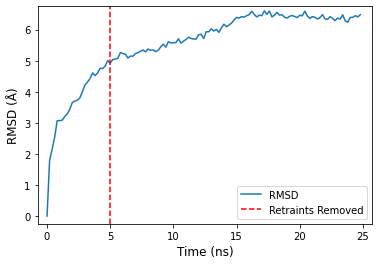

In [14]:
# Plot the graph

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim(-0.75, 25.75)
ax.set_ylim(-0.25, 6.75)
ax.set_xlabel('Time (ns)', fontsize=12)
ax.set_ylabel('RMSD (Å)', fontsize=12)


line_up, = ax.plot(timens, angstrom_RMSD_protein, label='RMSD')
vert = ax.axvline(5, c='r', linestyle='dashed', label='Retraints Removed')

ax.legend(handles=[line_up, vert], fontsize=10)

plt.savefig('Leu-RMSD-A.png')

### Asphericity

In [8]:
is_it_sphere = md.asphericity(traj_protein_selection)

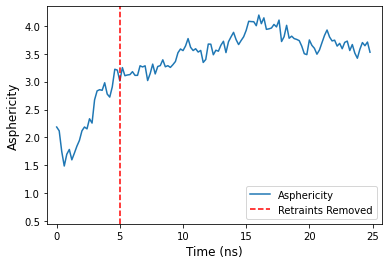

In [13]:
# Plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim(-0.75, 25.75)
ax.set_ylim(0.45, 4.35)
ax.set_xlabel('Time (ns)', fontsize=12)
ax.set_ylabel('Asphericity', fontsize=12)


line_up, = ax.plot(timens, is_it_sphere, label='Asphericity')
vert = ax.axvline(5, c='r', linestyle='dashed', label='Retraints Removed')

ax.legend(handles=[line_up, vert], fontsize=10)

plt.savefig('Leu-Asphericity.png')

### Radius of gyration

In [10]:
r_gyration = md.compute_rg(traj_protein_selection)

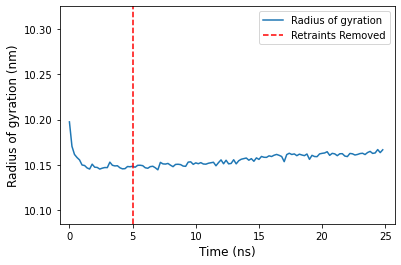

In [12]:
# Plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim(-0.75, 25.75)
ax.set_ylim(10.085, 10.325)
ax.set_xlabel('Time (ns)', fontsize=12)
ax.set_ylabel('Radius of gyration (nm)', fontsize=12)


line_up, = ax.plot(timens, r_gyration, label='Radius of gyration')
vert = ax.axvline(5, c='r', linestyle='dashed', label='Retraints Removed')

ax.legend(handles=[line_up, vert], fontsize=10)

plt.savefig('Leu-RadiusGyration.png')